[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya/IA-Educacion/blob/master/Kmeans.ipynb)

Se presentan algunas herramientas básicas para el abordar el tema de la Inteligencia Artificial y llevarla al Aula.

En esta guía se desarrollará una aplicación de Aprendizaje de Máquina (*Machine Learning, ML*). Específicamente se empleará el algoritmo K-Means para crear grupos y clasificar datos.

El trabajo se realizará empleando código en Python. Un buen resumen de los aspectos básicos de Python: <br>
[Introducción a Python](https://colab.research.google.com/github/FerneyOAmaya/DataLiteracy/blob/master/0_Python.ipynb)

Se tomó como guía la actividad presentada en: <br>
https://realpython.com/k-means-clustering-python/

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/


Contenido:
1. K-Means
2. Optimizar el número de grupos
3. Resultado

# K- Means

###**Paso 1** : Llamar a las bibliotecas

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

###**Paso 2** : Crear conjunto de datos de prueba

In [ ]:
datos, etiquetas_reales = make_blobs(
     n_samples=200,
     centers=3,
     cluster_std=2.75,
     random_state=42
)

###**Paso 3** : Escalar el conjunto de datos
El escalamiento de los datos entrega valores con media de 0 y desviación estándar de 1

In [ ]:
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

La gráfica con los datos sin escalar y escalados se presenta a continuación.

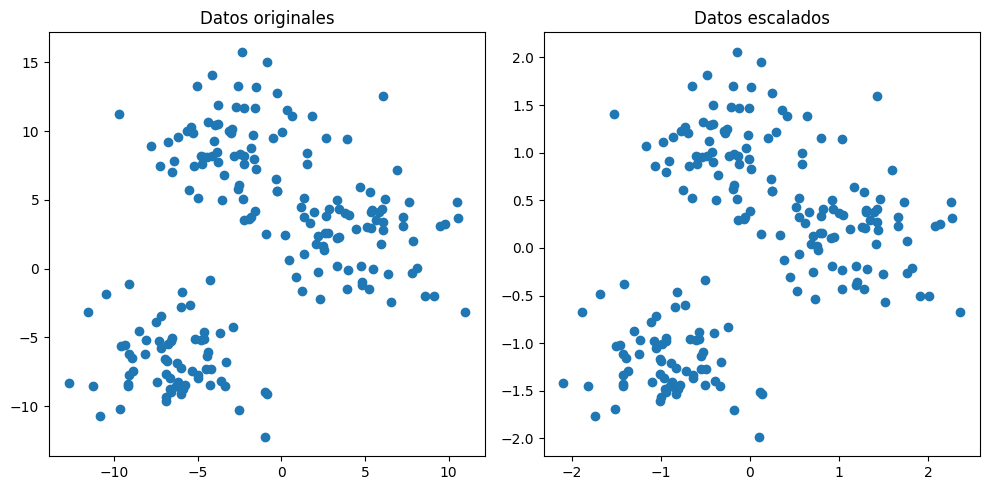

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Puntos sin escalar
ax[0].scatter(datos[:, 0], datos[:, 1])
ax[0].set_title("Datos originales")

# Scatter plot of the scaled data
ax[1].scatter(datos_escalados[:, 0], datos_escalados[:, 1])
ax[1].set_title("Datos escalados")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

###**Paso 4** : Emplear k-means

Estos son los parámetros:
- init: controla la técnica de inicialización, "random" indica aleatorio.
- n_clusters: número de grupos.
- n_init: cantidad de inicializaciones o ejecuciones diferentes y entrega el mejor resultado.
- max_iter: número máximo de iteraciones para cada inicialización.

In [ ]:
 kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)
kmeans.fit(datos_escalados)
centroides = kmeans.cluster_centers_

###**Paso 5** : Analizar los resultados
Los resultados de la ejecución están disponibles como atributos de *kmeans*. Los principales son:
- kmeans.inertia_ : parámetro de desempeño que indica que tan buena es la agrupación. Se llama SSE (*Sum of Square Error*, suma de los errores cuadrados).
- kmeans.cluster_centers_: valor de los centroides de cada agrupación (cluster).
- kmeans.labels_: etiquetas asignadas con el valor del grupo al que pertenecen.

In [ ]:
# El menor valor SSE
print(kmeans.inertia_)
# Ubicación final de los centroides
print(kmeans.cluster_centers_)
# Las etiquetas de cada registro
print(kmeans.labels_)

74.57960106819854
[[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]
[2 0 1 1 1 1 0 1 2 1 2 2 2 2 0 1 0 1 2 1 2 2 1 0 1 0 0 1 0 2 2 2 1 1 0 0 1
 0 1 0 2 0 1 2 1 2 2 1 2 0 1 0 1 0 0 0 1 2 0 2 1 0 1 1 1 1 0 0 1 0 0 1 0 2
 2 2 2 0 2 0 0 2 1 1 1 1 1 0 2 1 2 0 0 0 2 1 0 2 2 0 1 1 0 1 0 2 1 2 2 1 2
 2 0 1 0 1 1 0 0 0 1 2 0 1 1 2 0 0 2 0 2 1 0 1 1 2 2 2 0 2 0 0 1 2 2 0 2 1
 1 2 0 1 2 1 2 1 1 0 2 2 0 2 2 1 0 2 2 0 1 2 1 0 2 1 0 2 0 0 0 2 0 2 1 1 1
 0 2 2 2 0 0 2 1 1 0 1 0 0 2 2]


# Optimizar el número de grupos
Para encontrar el número óptimo de grupos se emplea el método del codo. Se grafica el SSE para diferentes valores de grupo y se escoge el valor donde inicia la inflexión.

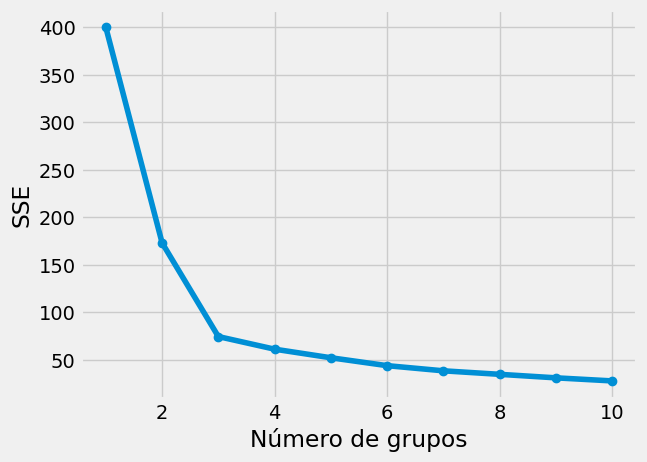

In [ ]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
   "random_state": 42,
}
sse = []
grupos = range(1,11)
for k in grupos:
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(datos_escalados)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(grupos, sse, '-o')
plt.xlabel("Número de grupos")
plt.ylabel("SSE")
plt.show()

# Resultado

De la gráfica del método del codo se observa que el valor óptimo es 3. En la siguiente figura se presenta el resultado.

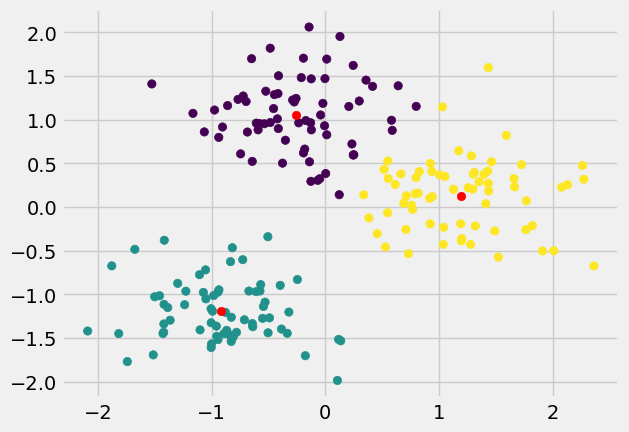

In [ ]:
plt.scatter(datos_escalados[:, 0], datos_escalados[:, 1], c=kmeans.labels_)
plt.scatter(centroides[:, 0], centroides[:, 1], color='red')
plt.show()